# 평가지표와 측정

### 불균형 데이터 세트

#### 불균형 데이터 세트를 사용하면 발생하는 결과 예시

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [3]:
from sklearn.dummy import DummyClassifier
import numpy as np

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


아무런 학습을 하지 않았어도 90% 의 정확도를 얻었다

#### 실제 분류기를 사용하여 정확도를 측정한다

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


정확도가 dummy 분류기보다 조금 나아졌다

그렇다면 , 이 문제에서는 정확도 높은 측정 방법 을 선택한 것이
적합하지 않다고 추정할 수 있다

#### dummy 분류기와 로지스틱 회귀 분석을 비교한다

In [5]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.81
logreg 점수: 0.98


C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 오차 행렬

In [6]:
from sklearn.metrics import confusion_matrix
import mglearn

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


오차 행렬:
 [[402   1]
 [  6  41]]


C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


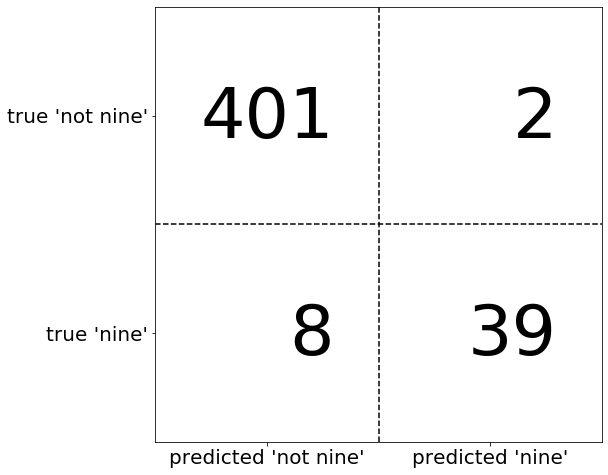

In [7]:
mglearn.plots.plot_confusion_matrix_illustration()

대각선이 정확히 분류된 것이다

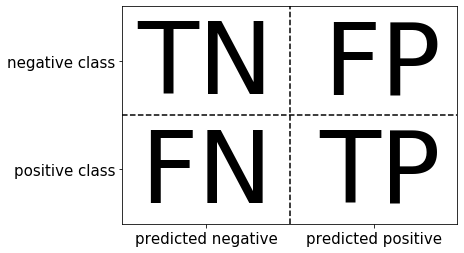

In [8]:
mglearn.plots.plot_binary_confusion_matrix()

- 암 예측과 연계하면, 정확하게 분류된 것을 TN, TP 이라 한다
- 잘못 분류된 것을 PN, FP라 한다
- 이 오차 행렬을 이용하여 dummy, 결정 트리 , 로지스틱 회귀를 비교한다

In [9]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[354  49]
 [ 41   6]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


- 빈도 기반 더미 모델
  - 동일한 클래스를 예측한다
- 무작위 더미 모델
  - 진짜 양성 수가 너무 적다
- 결정 트리
- 로지스틱 회귀
  - 모든 면에서 결정 트리보다 낫다

### 정확도와의 관계

#### 숫자 9 와 9 가 아님 데이터 세트를 이용한 예측 사례

In [10]:
from sklearn.metrics import f1_score

print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.12
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


f1 score 를 사용하여 평가하면 직관적으로 좋은 모델을 파악할
수 있으나 , 이해 혹은 설명이 힘들다

#### classification_report 함수
- 빈도 기반 더미 분류기 평가
- 9를 양성으로 했다
- support: 클래스에 있는 진짜 샘플 수
- micro avg : 클래스별 정확률 평균 수치
- macro avg : 클래스별 점수의 평균 수치
- weighted avg : 클래스의 샘플 수로 가중 평균한 수치

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


무작위 더미 분류기 평가

In [12]:
print(classification_report(y_test, pred_dummy,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      0.88      0.89       403
           9       0.11      0.13      0.12        47

    accuracy                           0.80       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.80      0.81       450



로지스틱 회귀

In [13]:
print(classification_report(y_test, pred_logreg,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



### 불확실성 고려

#### 불균형한 이진 분류 문제 사례
- 음성 클래스 : 400, 양성 클래스 : 50

In [14]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

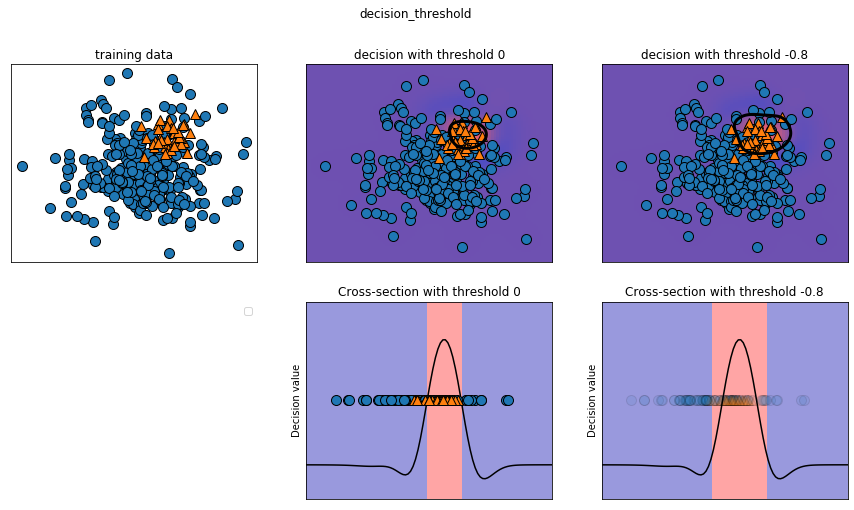

In [15]:
mglearn.plots.plot_decision_threshold()

검은 원이 decision_function이 정확히 0일때 임계점이다
이 원안의 포인트는 양성 클래스로 분류된다

#### classification_report 함수를 이용한 정확률과 재현율 평가

In [16]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



- 클래스 0 의 샘플 수가 많으므로 분류기는 클래스 0 에 초점을 맞추고 있다
- 암 진단의 예에서 본다면 클래스 1 의 재현율을 높이는 게 중요할 수 있다

#### 임계값을 조정하여 클래스 1 의 재현율을 높이도록 예측을 조정

In [17]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [18]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



- 클래스 1 의 재현율이 높아졌고 , 정확률은 낮아졌다
- 임계값 수정을 통해 재현율 혹은 정확률 조정이 가능하다

#### 정밀도 재현율 곡선

In [19]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

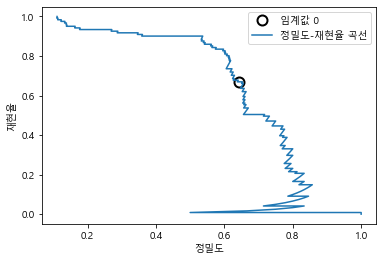

In [20]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)


# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

- 임계값 0 은 decision_function 의 기본 값이다 (predict 메서드를 사용할 때 사용되는 임계값이다
- 곡선이 오른쪽 위로 올라갈 수록 좋은 분류기이다

#### ROC

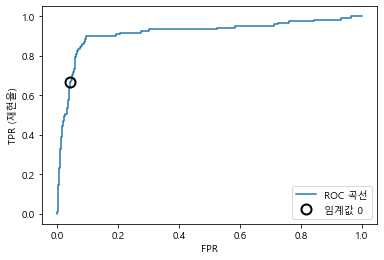

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

- ROC 곡선은 왼쪽 위에 가까울수록 이상적이다
  - 거짓 양성 비율(FRP)이 낮게 유지되면서 제현율이 높은 분류기가 좋은 것이다
- 현재 임계점을 볼 때 , FRP를조금 늘리면 재현율을 크게 높일 수 있다

#### SVM 과 랜덤포레스트 ROC 곡선 비교

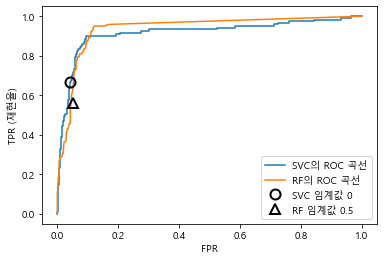

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)